In [155]:
import numpy as np
from matplotlib import pyplot as plt
import time

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [156]:
np.random.seed(0)

In [157]:
my_sizeNtimes=[]
sK_sizeNtimes=[]
d1=np.random.rand(100,2)
d2=np.random.rand(200,2)
d3=np.random.rand(300,2)
d4=np.random.rand(400,2)
d5=np.random.rand(500,2)
d6=np.random.rand(600,2)
d7=np.random.rand(700,2)
d8=np.random.rand(800,2)

In [158]:
c1=np.random.choice([-1,1],d1.shape[0]).reshape(-1,1)
c2=np.random.choice([-1,1],d2.shape[0]).reshape(-1,1)
c3=np.random.choice([-1,1],d3.shape[0]).reshape(-1,1)
c4=np.random.choice([-1,1],d4.shape[0]).reshape(-1,1)
c5=np.random.choice([-1,1],d5.shape[0]).reshape(-1,1)
c6=np.random.choice([-1,1],d6.shape[0]).reshape(-1,1)
c7=np.random.choice([-1,1],d7.shape[0]).reshape(-1,1)
c8=np.random.choice([-1,1],d8.shape[0]).reshape(-1,1)



In [159]:
# hard-coded SVM
def mySVM(X,y):    
    C = 100
    m,n = X.shape
    Xy = y * X
    H = np.dot(Xy , Xy.T)

    P = cvxopt_matrix(H)
    q = cvxopt_matrix(-np.ones((m, 1)))
    G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
    h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
    A = cvxopt_matrix(y.T*1.0)
    b = cvxopt_matrix(np.zeros(1))
    
    start=time.time()
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    end=time.time()

    lambdas = np.array(sol['x'])
    w = np.matmul((y * lambdas).T,X).reshape(-1,1)
    Sv = ((lambdas>0.09999) ).flatten()
    w0 = np.mean(y[Sv] - np.dot(X[Sv], w))
    my_sizeNtimes.append([X.shape[0],(end-start)*10**3])
    return((end-start)*10**3, w, w0 )


In [160]:
#sklearn SVM
def skSvm(X,y):
    starts = time.time()
    model = SVC(C = 100, kernel = 'linear')
    model.fit(X, y.reshape(-1)) 
    ends = time.time()
    sK_sizeNtimes.append([X.shape[0],(ends-starts)*10**3])

    return((ends-starts)*10**3 ,model.coef_, model.intercept_)


In [161]:
mySVM(d1,c1)
skSvm(d1,c1)

mySVM(d2,c2)
skSvm(d2,c2)

mySVM(d3,c3)
skSvm(d3,c3)

mySVM(d4,c4)
skSvm(d4,c4)

mySVM(d5,c5)
skSvm(d5,c5)

mySVM(d6,c6)
skSvm(d6,c6)

mySVM(d7,c7)
skSvm(d7,c7)

mySVM(d8,c8)
skSvm(d8,c8)

     pcost       dcost       gap    pres   dres
 0: -4.7256e+03 -1.3450e+05  1e+05  2e-13  1e-13
 1: -5.2570e+03 -1.1001e+04  6e+03  6e-14  1e-13
 2: -8.3966e+03 -9.9508e+03  2e+03  4e-14  1e-13
 3: -8.7835e+03 -8.8880e+03  1e+02  3e-13  2e-13
 4: -8.7998e+03 -8.8009e+03  1e+00  2e-13  2e-13
 5: -8.8000e+03 -8.8000e+03  1e-02  3e-13  2e-13
 6: -8.8000e+03 -8.8000e+03  1e-04  3e-13  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.8737e+03 -3.6584e+05  4e+05  5e-13  2e-13
 1: -1.0076e+04 -2.2453e+04  1e+04  5e-13  1e-13
 2: -1.6504e+04 -1.8692e+04  2e+03  6e-14  2e-13
 3: -1.6932e+04 -1.7844e+04  9e+02  6e-13  2e-13
 4: -1.7173e+04 -1.7433e+04  3e+02  6e-13  2e-13
 5: -1.7235e+04 -1.7342e+04  1e+02  2e-13  1e-13
 6: -1.7262e+04 -1.7300e+04  4e+01  3e-13  2e-13
 7: -1.7271e+04 -1.7287e+04  2e+01  5e-13  2e-13
 8: -1.7278e+04 -1.7279e+04  1e+00  3e-13  2e-13
 9: -1.7278e+04 -1.7279e+04  2e-01  5e-13  2e-13
10: -1.7278e+04 -1.7278e+04  3e-03  1e-13  2e-1

(16.42584800720215, array([[1.98559285, 0.19452693]]), array([-1.11596467]))

In [162]:
sK_sizeNtimes=np.array(sK_sizeNtimes)
my_sizeNtimes=np.array(my_sizeNtimes)

Text(0.5, 1.0, 'Time complexity comparison of SVM methods')

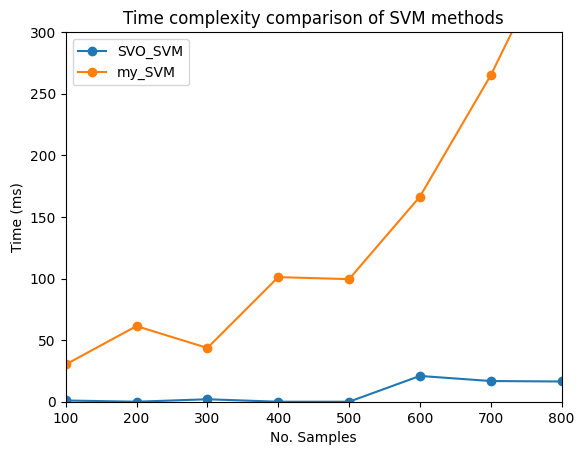

In [163]:
plt.plot(sK_sizeNtimes.T[0], sK_sizeNtimes.T[1],marker='o',label='SVO_SVM')
plt.plot(my_sizeNtimes.T[0], my_sizeNtimes.T[1],marker='o',label='my_SVM')

plt.ylim(0,300)
plt.xlim(100,800)

plt.xlabel('No. Samples')
plt.ylabel('Time (ms)')

plt.legend(loc="upper left")
plt.title('Time complexity comparison of SVM methods')